In [ ]:
#continuation of transport dataset
#uploading and reading dataset

#آپلود فایل از طریق گوگل درایو
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

transport_df=pd.read_excel('/content/drive/MyDrive/transportation_phase2.Zeinab_Jafarzadeh/bahman.xlsx')

In [ ]:
#5 first rows of dataset with head()
transport_df.head()

,Value added insurance premium,Received from the driver,Scale fee,Evacuation fee,added value,Complications of moving goods,Bill of lading registration time,Tracking code watch,Date of interception,Company commission,...,Product code,distance,weight,Calculation fare,rent,bill of lading number,Bill of lading series,Company name,Company code,year
0,6300000,84036000,0,0,0,15602553,09:50,09:53,1403/11/01,13868936,...,3211800,175,22000,173361702,173361702,2585287,1403.12,سعدي سير (تهران ),111100126,1403
1,100000,15127000,0,0,0,14851915,11:34,16:41,1403/11/02,13201702,...,5300200,69,22000,165021277,165021277,5956933,1402.15,سعدي سير (تهران ),111100126,1403
2,18210,1712861,0,0,0,1089000,18:36,18:46,1403/11/05,363000,...,1820400,104,3000,12100000,12100000,8220196,1403.12,بلم لجستيک,111100195,1403
3,43750,1868763,0,0,0,999000,14:46,14:56,1403/11/01,333000,...,1820400,118,3000,11100000,11100000,8219442,1403.12,بلم لجستيک,111100195,1403
4,100000,3475000,0,0,0,1710000,21:30,21:40,1403/11/02,570000,...,1820400,199,3000,19000000,19000000,8219741,1403.12,بلم لجستيک,111100195,1403


In [ ]:
transport_df.shape

(53714, 43)

In [ ]:
transport_df['Unnamed: 24']

,Unnamed: 24
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
53709,NaN
53710,NaN
53711,NaN
53712,NaN


In [ ]:
#حذف ستون مذکور
transport_df=transport_df.drop(columns=['Unnamed: 24'])

In [ ]:
#طبق تعداد ستونهایی که در زیر می بینید یک ستون حذف شده است
transport_df.shape

(53714, 42)

Word Embedding with Fast-text method for 'Product name' column

In [ ]:
!pip install fasttext huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498200 sha256=37c1d1dd538f3438c0132bf34fad11f9a760cba1a1222421fc497fbc8d756634
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [ ]:
from huggingface_hub import hf_hub_download

# دانلود مدل fastText فارسی رسمی
model_path = hf_hub_download(
    repo_id="facebook/fasttext-fa-vectors", filename="model.bin"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.bin:   0%|          | 0.00/7.25G [00:00<?, ?B/s]

In [ ]:
import fasttext

ft = fasttext.load_model(model_path)
print("Model dimension:", ft.get_dimension())

Model dimension: 300


In [ ]:
import numpy as np

def get_emb(text):
    return ft.get_word_vector(text) if isinstance(text, str) else np.zeros(ft.get_dimension())

In [ ]:
def mean_embedding(text):
    if not isinstance(text, str):
        return np.zeros(ft.get_dimension())
    tokens = text.split()
    vectors = [ft.get_word_vector(tok) for tok in tokens]
    return np.mean(vectors, axis=0)

transport_df['embedding'] = transport_df['product name'].apply(mean_embedding)

In [ ]:
transport_df['embedding']

,embedding
0,"[0.02935956, -0.00723722, -0.024591941, 0.0583..."
1,"[-0.046475224, 0.04788389, -0.0631249, -0.0091..."
2,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953..."
3,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953..."
4,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953..."
...,...
53709,"[0.12174225, 0.18659243, -0.13751402, 0.076490..."
53710,"[0.066438556, 0.060211133, -0.056071043, -0.04..."
53711,"[0.018926123, 0.059629016, 0.017194767, 0.0044..."
53712,"[-0.010870729, 0.06814437, 0.021550313, 0.0710..."


ستون embedding

در واقع همان بردارهای مربوط به نام کالاها است . یعنی هر سطر که بردار در آن قرار گرفته نشان دهنده بردار نام کالا می باشد. یعنی

fast text آمده و نام کالا را به بردار تبدیل کرده تا ما بتوانیم در ادامه خوشه بندی انجام دهیم

In [ ]:
!pip install umap-learn --quiet
import umap
import numpy as np

X = np.stack(transport_df['embedding'].values)

sample_size = 50000
sample_idx = np.random.choice(len(X), size=sample_size, replace=False)
X_sample = X[sample_idx]

# مرحله 3: تعریف و fit مدل UMAP روی داده نمونه
umap_model = umap.UMAP(
    n_components=10,
    n_neighbors=10,
    min_dist=0.1,
    metric='cosine',
    low_memory=True,
    random_state=42
)
X_umap_sample = umap_model.fit_transform(X_sample)

# مرحله 4: transform روی کل داده (سبک‌تر از fit)
X_umap = umap_model.transform(X)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


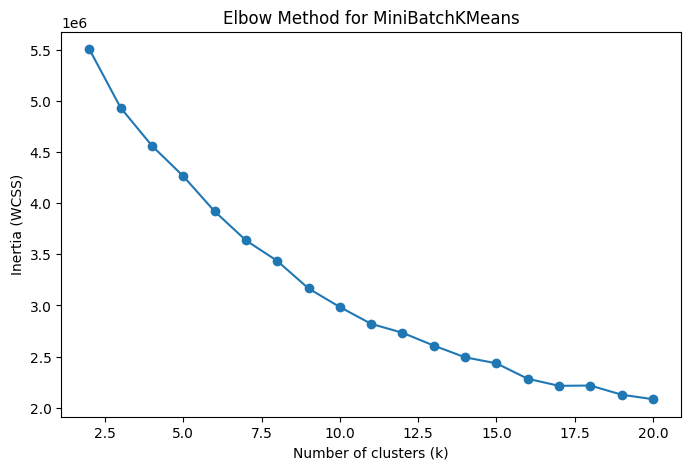

In [ ]:
#  را بدست می آوریمkبهترین مقدار Elbowبا استفاده از روش
#(Elbow)بررسی تعداد خوشه ها با روش
#importing needed libraries
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

k_values = range(2, 21)  # مثلا 2 تا 20 خوشه
inertia_values = []


for k in k_values:
    miniBatchKMeans = MiniBatchKMeans(n_clusters=k, batch_size=10000, random_state=42)
    miniBatchKMeans.fit(X_umap)  # X_umap = داده‌های UMAP بعد از transform
    inertia_values.append(miniBatchKMeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for MiniBatchKMeans")
plt.show()


In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Elbow check (need)
n_clusters = 12

kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    random_state=42,
    batch_size=10000,
    max_iter=100
)

clusters = kmeans.fit_predict(X_umap)
transport_df['product cluster'] = clusters

In [ ]:
for i in range(n_clusters):
    نمونه = transport_df[transport_df['product cluster'] == i]['product name'].sample(1000, random_state=42).tolist()
    print(f"خوشه {i}:")
    print(نمونه)
    print("="*50)

خوشه 0:
['كفش', 'موتورسيكلت', 'لوازم اتومبيل', 'كفش', 'وسائل پزشكي', 'سواري تصادفي', 'كاميونت', 'پمپ بتن', 'سوله', 'لوازم موتورسيكلت', 'موتورسيكلت', 'قطعات اتومبيل', 'لوازم موتور', 'كولرگازي', 'كمپرسور دستگاه', 'كفش', 'دوچرخه', 'انواع فنروكمك فنر', 'تجهيزات مخابراتي', 'دستگاه تراش', 'كاله', 'كارتن وجعبه', 'موتورسيكلت', 'دوچرخه', 'باطري ماشين', 'موتورسيكلت', 'سوله', 'بيل مكانيكي', 'قطعات اتومبيل', 'لوازم اتومبيل', 'كفش', 'مواداوليه لاستيك', 'كابل', 'موتورسيكلت', 'موتورسيكلت', 'كارتن وجعبه', 'موتورسيكلت', 'موتورسيكلت', 'موتورسيكلت', 'كفش', 'اسباب بازي', 'كفش', 'موتورسيكلت', 'باطري ماشين', 'انواع فنروكمك فنر', 'تجهيزات مخابراتي', 'لوازم موتورسيكلت', 'لوازم موتورسيكلت', 'موتورسيكلت', 'كفش', 'كارتن وجعبه', 'جعبه وكارتن', 'لوازم اتومبيل', 'موتورسيكلت', 'كمپرسور دستگاه', 'كفش', 'انواع فنروكمك فنر', 'موتورسيكلت', 'دوچرخه', 'قطعات اتومبيل', 'تجهيزات مخابراتي', 'اسباب بازي', 'ماشين آلات صنعتي', 'كفش', 'ماشين آلات صنعتي', 'قطعات اتومبيل', 'كارتن وجعبه', 'كارتن وجعبه', 'ماشين لباسشوئي', 'سواري تصا

In [ ]:
transport_df.head(5)

,Value added insurance premium,Received from the driver,Scale fee,Evacuation fee,added value,Complications of moving goods,Bill of lading registration time,Tracking code watch,Date of interception,Company commission,...,weight,Calculation fare,rent,bill of lading number,Bill of lading series,Company name,Company code,year,embedding,product cluster
0,6300000,84036000,0,0,0,15602553,09:50,09:53,1403/11/01,13868936,...,22000,173361702,173361702,2585287,1403.12,سعدي سير (تهران ),111100126,1403,"[0.02935956, -0.00723722, -0.024591941, 0.0583...",0
1,100000,15127000,0,0,0,14851915,11:34,16:41,1403/11/02,13201702,...,22000,165021277,165021277,5956933,1402.15,سعدي سير (تهران ),111100126,1403,"[-0.046475224, 0.04788389, -0.0631249, -0.0091...",0
2,18210,1712861,0,0,0,1089000,18:36,18:46,1403/11/05,363000,...,3000,12100000,12100000,8220196,1403.12,بلم لجستيک,111100195,1403,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953...",1
3,43750,1868763,0,0,0,999000,14:46,14:56,1403/11/01,333000,...,3000,11100000,11100000,8219442,1403.12,بلم لجستيک,111100195,1403,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953...",1
4,100000,3475000,0,0,0,1710000,21:30,21:40,1403/11/02,570000,...,3000,19000000,19000000,8219741,1403.12,بلم لجستيک,111100195,1403,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953...",1


In [ ]:
label_map = {
   0 : 'وسایل نقلیه و قطعات خودرو',
   1 :  'کالاهای مصرفی بسته‌بندی‌شده',
   2 : 'ضایعات و پسماندهای حیوانی' ,
   3:'لوازم خانگی و دکوراسیون' ,
   4:'مصالح ساختمانی و فلزات' ,
   5:'مواد شیمیایی و صنعتی' ,
   6:'مواد غذایی و خوراک دام' ,
   7:'سنگ و مصالح معدنی' ,
   8: 'محصولات کشاورزی و دامی',
   9: 'کالاهای شیمیایی و بهداشتی',
   10: 'نفت و فرآورده‌های نفتی',
   11 : 'سیمان و مصالح بنایی'
}

In [ ]:
transport_df['label'] = transport_df['product cluster'].map(label_map)

In [ ]:
transport_df.head()

,Value added insurance premium,Received from the driver,Scale fee,Evacuation fee,added value,Complications of moving goods,Bill of lading registration time,Tracking code watch,Date of interception,Company commission,...,Calculation fare,rent,bill of lading number,Bill of lading series,Company name,Company code,year,embedding,product cluster,label
0,6300000,84036000,0,0,0,15602553,09:50,09:53,1403/11/01,13868936,...,173361702,173361702,2585287,1403.12,سعدي سير (تهران ),111100126,1403,"[0.02935956, -0.00723722, -0.024591941, 0.0583...",0,وسایل نقلیه و قطعات خودرو
1,100000,15127000,0,0,0,14851915,11:34,16:41,1403/11/02,13201702,...,165021277,165021277,5956933,1402.15,سعدي سير (تهران ),111100126,1403,"[-0.046475224, 0.04788389, -0.0631249, -0.0091...",0,وسایل نقلیه و قطعات خودرو
2,18210,1712861,0,0,0,1089000,18:36,18:46,1403/11/05,363000,...,12100000,12100000,8220196,1403.12,بلم لجستيک,111100195,1403,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953...",1,کالاهای مصرفی بسته‌بندی‌شده
3,43750,1868763,0,0,0,999000,14:46,14:56,1403/11/01,333000,...,11100000,11100000,8219442,1403.12,بلم لجستيک,111100195,1403,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953...",1,کالاهای مصرفی بسته‌بندی‌شده
4,100000,3475000,0,0,0,1710000,21:30,21:40,1403/11/02,570000,...,19000000,19000000,8219741,1403.12,بلم لجستيک,111100195,1403,"[-0.0070941914, 0.2171679, 0.03251712, 0.18953...",1,کالاهای مصرفی بسته‌بندی‌شده


In [ ]:
transport_df['label'].value_counts()

,count
label,
سیمان و مصالح بنایی,5800
مواد شیمیایی و صنعتی,5677
مواد غذایی و خوراک دام,5483
نفت و فرآورده‌های نفتی,4987
کالاهای شیمیایی و بهداشتی,4662
لوازم خانگی و دکوراسیون,4625
مصالح ساختمانی و فلزات,4551
سنگ و مصالح معدنی,4307
محصولات کشاورزی و دامی,3653


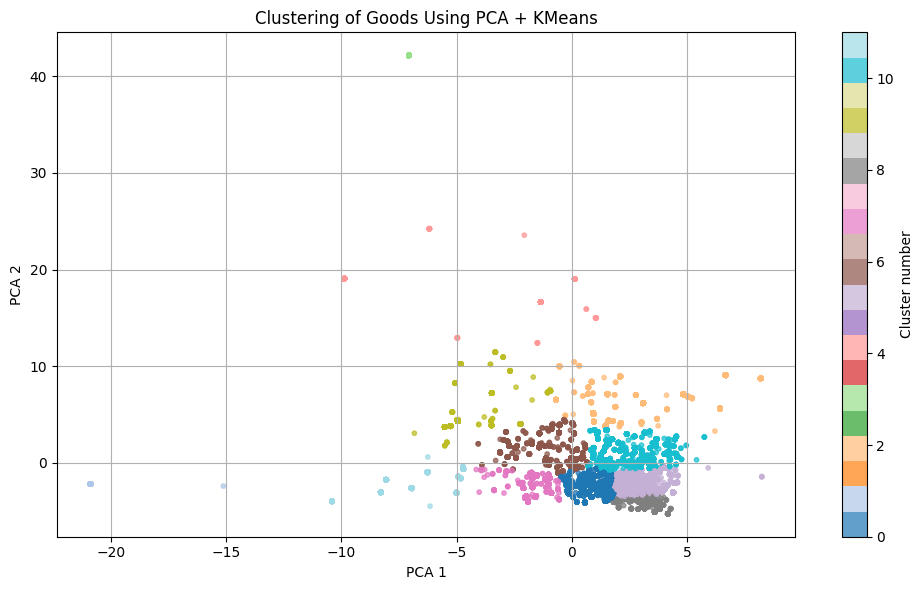

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import ast

transport_df['embedding'] = transport_df['embedding']

# تبدیل به numpy array
X = np.stack(transport_df['embedding'].values)

# نرمال‌سازی
X_scaled = StandardScaler().fit_transform(X)

# کاهش بعد با PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# خوشه‌بندی
kmeans = KMeans(n_clusters=12, random_state=42)
labels = kmeans.fit_predict(X_pca)

# افزودن به دیتافریم
transport_df['PCA 1'] = X_pca[:, 0]
transport_df['PCA 2'] = X_pca[:, 1]
transport_df['Cluster'] = labels

# مصورسازی
plt.figure(figsize=(10, 6))
scatter = plt.scatter(transport_df['PCA 1'], transport_df['PCA 2'], c=transport_df['Cluster'], cmap='tab20', s=10, alpha=0.7)
plt.colorbar(scatter, label='Cluster number')
plt.title("Clustering of Goods Using PCA + KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

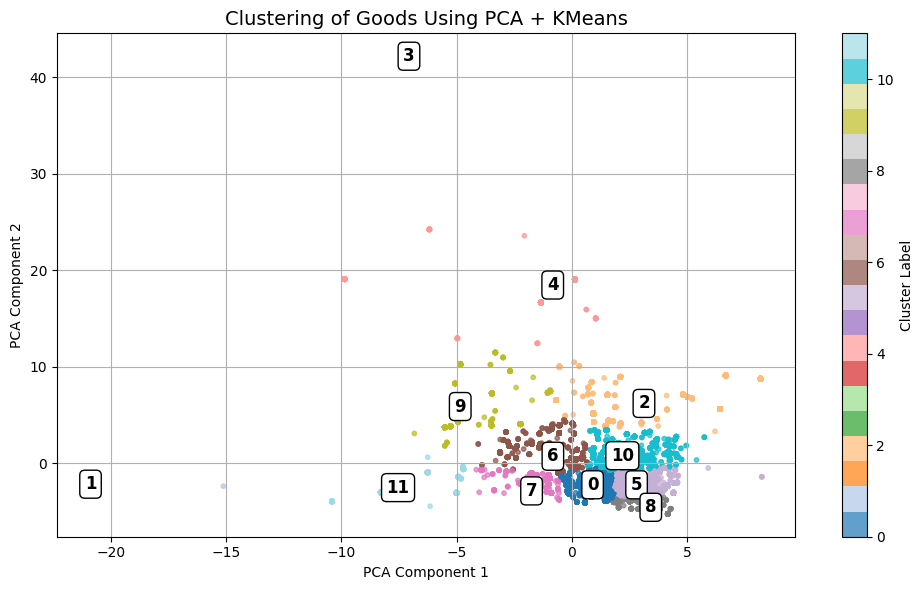

In [ ]:
import matplotlib.pyplot as plt

# رسم نقاط
plt.figure(figsize=(10, 6))
scatter = plt.scatter(transport_df['PCA 1'], transport_df['PCA 2'], c=transport_df['Cluster'], cmap='tab20', s=10, alpha=0.7)

# اضافه کردن رنگ و شماره خوشه
plt.colorbar(scatter, label='Cluster Label')

# اضافه کردن شماره‌ی هر خوشه در مرکز آن
for label in sorted(transport_df['Cluster'].unique()):
    x_mean = transport_df[transport_df['Cluster'] == label]['PCA 1'].mean()
    y_mean = transport_df[transport_df['Cluster'] == label]['PCA 2'].mean()
    plt.text(x_mean, y_mean, str(label), fontsize=12, weight='bold', color='black',
             ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# تنظیمات نهایی
plt.title("Clustering of Goods Using PCA + KMeans", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout() #تنظیم فاصله ها
plt.show()